##Procesamiento de la informacion

In [3]:
#Importar entorno de colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Importar librerias
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from scipy.interpolate import bisplrep, bisplev
import xarray as xr

In [5]:
#Importar archivo d estaciones
path_est = '/content/drive/MyDrive/CIGLAS 2024/DESPUES LO BORRO XD/PERDON XD/Estaciones.xlsx'
est = pd.read_excel(path_est, "Worksheet", engine='openpyxl')
est = est.iloc[:,[2,3,4,5,6]]

#Importar archivos de datos
pp_monthly = pd.read_csv("/content/drive/MyDrive/CIGLAS 2024/DESPUES LO BORRO XD/PERDON XD/cleaned_dataframes/pp_monthly.csv")
tmin_monthly = pd.read_csv("/content/drive/MyDrive/CIGLAS 2024/DESPUES LO BORRO XD/PERDON XD/cleaned_dataframes/tmin_monthly.csv")
tmax_monthly = pd.read_csv("/content/drive/MyDrive/CIGLAS 2024/DESPUES LO BORRO XD/PERDON XD/cleaned_dataframes/tmax_monthly.csv")

In [6]:
#Ordenando los archivos

#Precipitacion
pp_monthly["fecha"] = pd.to_datetime(pp_monthly['Unnamed: 0'])
pp_monthly = pp_monthly.set_index("fecha")
pp_monthly = pp_monthly.drop(columns=["Unnamed: 0"])

#Temperatura minima
tmin_monthly["fecha"] = pd.to_datetime(tmin_monthly['Unnamed: 0'])
tmin_monthly = tmin_monthly.set_index("fecha")
tmin_monthly = tmin_monthly.drop(columns=["Unnamed: 0"])

#Temperatura maxima
tmax_monthly["fecha"] = pd.to_datetime(tmax_monthly['Unnamed: 0'])
tmax_monthly = tmax_monthly.set_index("fecha")
tmax_monthly = tmax_monthly.drop(columns=["Unnamed: 0"])

In [7]:
#Filtracion de datos
filtrado_estaciones_pp = est[est["code"].isin(pp_monthly.columns)]
filtrado_estaciones_pp = filtrado_estaciones_pp.set_index("code").loc[pp_monthly.columns].reset_index()

filtrado_estaciones_tmin = est[est["code"].isin(tmin_monthly.columns)]
filtrado_estaciones_tmin = filtrado_estaciones_tmin.set_index("code").loc[tmin_monthly.columns].reset_index()

filtrado_estaciones_tmax = est[est["code"].isin(tmax_monthly.columns)]
filtrado_estaciones_tmax = filtrado_estaciones_tmax.set_index("code").loc[tmax_monthly.columns].reset_index()

##Prueba 2

Resolución espacial: 0.048626262626257244 (x), 0.0573737373737373 (y)


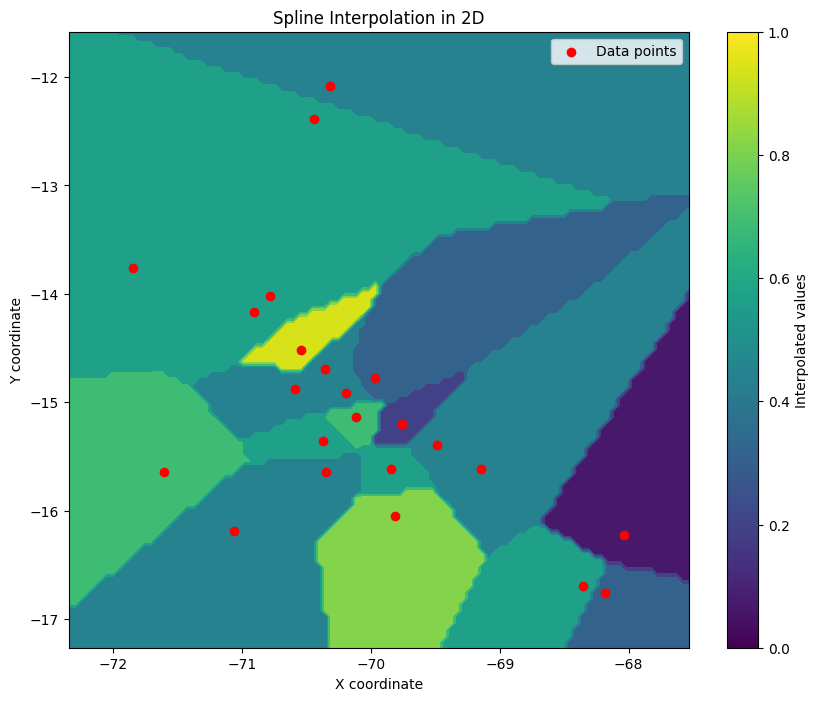

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

#se crea un generador de numeros aleatorios y se resta 0.5
# Datos de ejemplo
x = filtrado_estaciones_pp["lon"].to_list()
y = filtrado_estaciones_pp["lat"].to_list()
#distancia ecluediana entre cada par de coordenadas usando hypot(x,y)
z = pp_monthly.iloc[0].to_list()


#grid_y tiene las coordenadas de y en un espacio dimensional 2d
grid_x, grid_y = np.mgrid[min(x)-0.5:max(x)+0.5:100j, min(y)-0.5:max(y)+0.5:100j]
# Calcular la resolución espacial
resolution_x = (grid_x[1, 0] - grid_x[0, 0])

resolution_y = (grid_y[0, 1] - grid_y[0, 0])

print(f'Resolución espacial: {resolution_x} (x), {resolution_y} (y)')

# Realizar la interpolación spline
grid_z = griddata((x, y), z, (grid_x, grid_y), method='nearest')

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.contourf(grid_x, grid_y, grid_z, cmap='viridis')
plt.scatter(x, y, c='red', label='Data points')
plt.colorbar(label='Interpolated values')
plt.legend()
plt.title('Spline Interpolation in 2D')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

##Interpolacion spline (modelo)

In [ ]:
#Importar librerias
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

#Listas de los valores
x = filtrado_estaciones_pp["lon"].to_list() #Longitud
y = filtrado_estaciones_pp["lat"].to_list() #Latitud
z = pp_monthly.iloc[0].to_list() #Precipitacion

#Crearse las grillas con resolcion de 0.25
grid_x, grid_y = np.mgrid[-72:-67:21j, -18:-12:25j]

#Interpolacion spline con el metodo nearest
grid_z = griddata((x, y), z, (grid_x, grid_y), method='nearest')

##Bucle spline precipitacion

In [28]:
#Crearse las grillas con resolcion de 0.25
grid_x, grid_y = np.mgrid[-72:-67:25j, -18:-12:21j]

#Crearse una lista vacia
pp_monthly_spline = []
tmax_monthly_spline = []
tmin_monthly_spline = []

In [29]:
#Bucle para pp
for i in range(pp_monthly.shape[0]):
  x = filtrado_estaciones_pp["lon"].to_list()
  y = filtrado_estaciones_pp["lat"].to_list()
  z = pp_monthly.iloc[i].to_list()

  #Interpolacion spline con el metodo nearest
  grid_z = griddata((x, y), z, (grid_x, grid_y), method='nearest')
  pp_monthly_spline.append(grid_z)

#Bucle para tmax
for i in range(tmax_monthly.shape[0]):
  x = filtrado_estaciones_tmax["lon"].to_list()
  y = filtrado_estaciones_tmax["lat"].to_list()
  z = tmax_monthly.iloc[i].to_list()

  #Interpolacion spline con el metodo nearest
  grid_z = griddata((x, y), z, (grid_x, grid_y), method='nearest')
  tmax_monthly_spline.append(grid_z)

#Bucl para tmin
for i in range(tmin_monthly.shape[0]):
  x = filtrado_estaciones_tmin["lon"].to_list()
  y = filtrado_estaciones_tmin["lat"].to_list()
  z = tmin_monthly.iloc[i].to_list()

  #Interpolacion spline con el metodo nearest
  grid_z = griddata((x, y), z, (grid_x, grid_y), method='nearest')
  tmin_monthly_spline.append(grid_z)

In [30]:
#Creandose listas donde se guardaran las matrices de pp dependiendo su mes
enero_pp = []
febrero_pp = []
marzo_pp = []
abril_pp = []
mayo_pp = []
junio_pp = []
julio_pp = []
agosto_pp = []
septiembre_pp = []
octubre_pp = []
noviembre_pp = []
diciembre_pp = []

#Bucle para guardar las matrices en sus meses respectivos
for i in range(0, len(pp_monthly_spline), 12):
    enero_pp.append(pp_monthly_spline[i])
    febrero_pp.append(pp_monthly_spline[i + 1])
    marzo_pp.append(pp_monthly_spline[i + 2])
    abril_pp.append(pp_monthly_spline[i + 3])
    mayo_pp.append(pp_monthly_spline[i + 4])
    junio_pp.append(pp_monthly_spline[i + 5])
    julio_pp.append(pp_monthly_spline[i + 6])
    agosto_pp.append(pp_monthly_spline[i + 7])
    septiembre_pp.append(pp_monthly_spline[i + 8])
    octubre_pp.append(pp_monthly_spline[i + 9])
    noviembre_pp.append(pp_monthly_spline[i + 10])
    diciembre_pp.append(pp_monthly_spline[i + 11])

#Eliminando el ultimo termino
enero_pp.pop()
febrero_pp.pop()
marzo_pp.pop()
abril_pp.pop()
mayo_pp.pop()
junio_pp.pop()
julio_pp.pop()
agosto_pp.pop()
septiembre_pp.pop()
octubre_pp.pop()
noviembre_pp.pop()
diciembre_pp.pop()

array([[   nan,    nan,    nan,    nan,    nan, 128.2 , 128.2 , 128.2 ,
        128.2 , 128.2 , 128.2 , 183.5 , 183.5 , 183.5 , 183.5 , 183.5 ,
        183.5 , 183.5 , 183.5 , 183.5 , 143.4 ],
       [   nan,    nan,    nan,    nan,    nan,    nan, 128.2 , 128.2 ,
        128.2 , 128.2 , 128.2 , 183.5 , 183.5 , 183.5 , 183.5 , 183.5 ,
        183.5 , 183.5 , 183.5 , 143.4 , 143.4 ],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan, 128.2 ,
        128.2 , 128.2 , 128.2 , 113.05, 183.5 , 183.5 , 183.5 , 183.5 ,
        183.5 , 183.5 , 143.4 , 143.4 , 143.4 ],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan, 128.2 ,
        128.2 , 128.2 , 128.2 , 113.05, 113.05, 113.05, 183.5 , 183.5 ,
        183.5 , 183.5 , 143.4 , 143.4 , 143.4 ],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
        128.2 , 128.2 ,  69.8 , 113.05, 113.05, 113.05, 103.01, 103.01,
        183.5 , 143.4 , 143.4 , 143.4 , 143.4 ],
       [   nan,    nan,    nan,    

In [31]:
#Creandose listas donde se guardaran las matrices de tmax dependiendo su mes
enero_tmax = []
febrero_tmax = []
marzo_tmax = []
abril_tmax = []
mayo_tmax = []
junio_tmax = []
julio_tmax = []
agosto_tmax = []
septiembre_tmax = []
octubre_tmax = []
noviembre_tmax = []
diciembre_tmax = []

#Bucle para guardar las matrices en sus meses respectivos
for i in range(0, len(tmax_monthly_spline), 12):
    enero_tmax.append(tmax_monthly_spline[i])
    febrero_tmax.append(tmax_monthly_spline[i + 1])
    marzo_tmax.append(tmax_monthly_spline[i + 2])
    abril_tmax.append(tmax_monthly_spline[i + 3])
    mayo_tmax.append(tmax_monthly_spline[i + 4])
    junio_tmax.append(tmax_monthly_spline[i + 5])
    julio_tmax.append(tmax_monthly_spline[i + 6])
    agosto_tmax.append(tmax_monthly_spline[i + 7])
    septiembre_tmax.append(tmax_monthly_spline[i + 8])
    octubre_tmax.append(tmax_monthly_spline[i + 9])
    noviembre_tmax.append(tmax_monthly_spline[i + 10])
    diciembre_tmax.append(tmax_monthly_spline[i + 11])

#Eliminando el ultimo termino
enero_tmax.pop()
febrero_tmax.pop()
marzo_tmax.pop()
abril_tmax.pop()
mayo_tmax.pop()
junio_tmax.pop()
julio_tmax.pop()
agosto_tmax.pop()
septiembre_tmax.pop()
octubre_tmax.pop()
noviembre_tmax.pop()
diciembre_tmax.pop()

array([[14.22903226, 14.22903226, 14.22903226, 14.22903226, 14.22903226,
        19.26451613, 19.26451613, 19.26451613, 19.26451613, 19.26451613,
        19.26451613, 22.67741935, 22.67741935, 22.67741935, 22.67741935,
        22.67741935, 22.67741935, 22.67741935, 22.67741935, 22.67741935,
        15.08709677],
       [14.22903226, 14.22903226, 14.22903226, 14.22903226, 14.22903226,
        14.22903226, 19.26451613, 19.26451613, 19.26451613, 19.26451613,
        19.26451613, 22.67741935, 22.67741935, 22.67741935, 22.67741935,
        22.67741935, 22.67741935, 22.67741935, 22.67741935, 15.08709677,
        15.08709677],
       [14.22903226, 14.22903226, 14.22903226, 14.22903226, 14.22903226,
        14.22903226, 14.22903226, 19.26451613, 19.26451613, 19.26451613,
        19.26451613, 13.17419355, 22.67741935, 22.67741935, 22.67741935,
        22.67741935, 22.67741935, 22.67741935, 15.08709677, 15.08709677,
        15.08709677],
       [14.22903226, 14.22903226, 14.22903226, 14.22903226

In [32]:
#Creandose listas donde se guardaran las matrices de tmin dependiendo su mes
enero_tmin = []
febrero_tmin = []
marzo_tmin = []
abril_tmin = []
mayo_tmin = []
junio_tmin = []
julio_tmin = []
agosto_tmin = []
septiembre_tmin = []
octubre_tmin = []
noviembre_tmin = []
diciembre_tmin = []

#Bucle para guardar las matrices en sus meses respectivos
for i in range(0, len(tmin_monthly_spline), 12):
    enero_tmin.append(tmin_monthly_spline[i])
    febrero_tmin.append(tmin_monthly_spline[i + 1])
    marzo_tmin.append(tmin_monthly_spline[i + 2])
    abril_tmin.append(tmin_monthly_spline[i + 3])
    mayo_tmin.append(tmin_monthly_spline[i + 4])
    junio_tmin.append(tmin_monthly_spline[i + 5])
    julio_tmin.append(tmin_monthly_spline[i + 6])
    agosto_tmin.append(tmin_monthly_spline[i + 7])
    septiembre_tmin.append(tmin_monthly_spline[i + 8])
    octubre_tmin.append(tmin_monthly_spline[i + 9])
    noviembre_tmin.append(tmin_monthly_spline[i + 10])
    diciembre_tmin.append(tmin_monthly_spline[i + 11])

#Eliminando el ultimo termino
enero_tmin.pop()
febrero_tmin.pop()
marzo_tmin.pop()
abril_tmin.pop()
mayo_tmin.pop()
junio_tmin.pop()
julio_tmin.pop()
agosto_tmin.pop()
septiembre_tmin.pop()
octubre_tmin.pop()
noviembre_tmin.pop()
diciembre_tmin.pop()

array([[-0.08064516, -0.08064516, -0.08064516, -0.08064516, -0.08064516,
         4.14193548,  4.14193548,  4.14193548,  4.14193548,  4.14193548,
         4.14193548,  7.68387097,  7.68387097,  7.68387097,  7.68387097,
         7.68387097,  7.68387097,  7.68387097,  7.68387097,  7.68387097,
         5.09354839],
       [-0.08064516, -0.08064516, -0.08064516, -0.08064516, -0.08064516,
        -0.08064516,  4.14193548,  4.14193548,  4.14193548,  4.14193548,
         4.14193548,  7.68387097,  7.68387097,  7.68387097,  7.68387097,
         7.68387097,  7.68387097,  7.68387097,  7.68387097,  5.09354839,
         5.09354839],
       [-0.08064516, -0.08064516, -0.08064516, -0.08064516, -0.08064516,
        -0.08064516, -0.08064516,  4.14193548,  4.14193548,  4.14193548,
         4.14193548, -1.60645161,  7.68387097,  7.68387097,  7.68387097,
         7.68387097,  7.68387097,  7.68387097,  5.09354839,  5.09354839,
         5.09354839],
       [-0.08064516, -0.08064516, -0.08064516, -0.08064516

In [33]:
enero_tmax[0].shape

(25, 21)

##Creandose xarray

In [40]:
#Creando una lista de tiempo
tiempo = list(range(2000, 2010))
latitud = np.arange(-18, -11.75, 0.25)
longitud = np.arange(-72, -66.75, 0.25)

In [41]:
# Agregar todas las variables a una lista
meses_pp = [enero_pp, febrero_pp, marzo_pp, abril_pp, mayo_pp, junio_pp, julio_pp, agosto_pp, septiembre_pp, octubre_pp, noviembre_pp, diciembre_pp]
meses_tmax = [enero_tmax, febrero_tmax, marzo_tmax, abril_tmax, mayo_tmax, junio_tmax, julio_tmax, agosto_tmax, septiembre_tmax, octubre_tmax, noviembre_tmax, diciembre_tmax]
meses_tmin = [enero_tmin, febrero_tmin, marzo_tmin, abril_tmin, mayo_tmin, junio_tmin, julio_tmin, agosto_tmin, septiembre_tmin, octubre_tmin, noviembre_tmin, diciembre_tmin]

In [42]:
#Variables donde se guardarn los xarray
xarray_pp = []
xarray_tmax = []
xarray_tmin = []

#Bucle para la precipitacion
for i in meses_pp:
  xarray = xr.Dataset(data_vars={'pp': (('T', 'Y', 'X'), i)},
                           coords={'T': tiempo,'X': longitud, 'Y': latitud})
  xarray_pp.append(xarray)

#Bucle para la temperatura maxima
for i in meses_tmax:
  xarray = xr.Dataset(data_vars={'tmax': (('T', 'Y', 'X'), i)},
                           coords={'T': tiempo, 'X': longitud, 'Y': latitud})
  xarray_tmax.append(xarray)

#Bucle para la temperatura minima
for i in meses_tmin:
  xarray = xr.Dataset(data_vars={'tmin': (('T', 'Y', 'X'), i)},
                           coords={'T': tiempo, 'X': longitud, 'Y': latitud})
  xarray_tmin.append(xarray)

In [43]:
xarray_tmin[0].tmin.values[0].shape

(25, 21)

In [44]:
xarray_tmin[0]

<xarray.Dataset>
Dimensions:  (T: 10, Y: 25, X: 21)
Coordinates:
  * T        (T) int64 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
  * X        (X) float64 -72.0 -71.75 -71.5 -71.25 ... -67.75 -67.5 -67.25 -67.0
  * Y        (Y) float64 -18.0 -17.75 -17.5 -17.25 ... -12.75 -12.5 -12.25 -12.0
Data variables:
    tmin     (T, Y, X) float64 2.435 2.435 2.435 2.435 2.435 ... 8.7 8.7 8.7 8.7

##Guardando los xarray como archivos nc

In [45]:
#Listas con los nombre
meses_pp = ['enero_pp.nc', 'febrero_pp.nc', 'marzo_pp.nc', 'abril_pp.nc', 'mayo_pp.nc', 'junio_pp.nc', 'julio_pp.nc', 'agosto_pp.nc', 'septiembre_pp.nc', 'octubre_pp.nc', 'noviembre_pp.nc', 'diciembre_pp.nc']
meses_tmax = ['enero_tmax.nc', 'febrero_tmax.nc', 'marzo_tmax.nc', 'abril_tmax.nc', 'mayo_tmax.nc', 'junio_tmax.nc', 'julio_tmax.nc', 'agosto_tmax.nc', 'septiembre_tmax.nc', 'octubre_tmax.nc', 'noviembre_tmax.nc', 'diciembre_tmax.nc']
meses_tmin = ['enero_tmin.nc', 'febrero_tmin.nc', 'marzo_tmin.nc', 'abril_tmin.nc', 'mayo_tmin.nc', 'junio_tmin.nc', 'julio_tmin.nc', 'agosto_tmin.nc', 'septiembre_tmin.nc', 'octubre_tmin.nc', 'noviembre_tmin.nc', 'diciembre_tmin.nc']

# Define el directorio de salida y el nombre del archivo
output_directory = '/content/drive/MyDrive/CIGLAS 2024/DESPUES LO BORRO XD/PERDON XD/Datos/Datos_spline'

#Bucle para guardar todo los archivos de pp
for i in range(len(meses_pp)):
  output = f'{output_directory}/{meses_pp[i]}'
  xarray_pp[i].to_netcdf(output)

#Bucle para guardar todos los archivos de tmax
for i in range(len(meses_tmax)):
  output = f'{output_directory}/{meses_tmax[i]}'
  xarray_tmax[i].to_netcdf(output)

#Bucle para guardar todos los archivos de tmin
for i in range(len(meses_tmin)):
  output = f'{output_directory}/{meses_tmin[i]}'
  xarray_tmin[i].to_netcdf(output)